In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv("/Users/christinaland/Downloads/Challenge 19/Resources/crypto_market_data.csv",index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [5]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [6]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

In [8]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(scaler.fit_transform(df_market_data), index=df_market_data.index, columns=df_market_data.columns)
print(df_market_data_scaled.head())

# Copy the crypto names from the original DataFrame


# Set the coin_id column as index


# Display the scaled DataFrame


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [9]:
# Create a list with the number of k-values from 1 to 11
k_values = range(1, 11)

In [11]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(df_market_data_scaled)
    inertia.append(kmeans.inertia_)

    print(inertia)

[287.0]
[287.0, 212.1233420748626]
[287.0, 212.1233420748626, 165.1367523344681]
[287.0, 212.1233420748626, 165.1367523344681, 79.02243535120975]
[287.0, 212.1233420748626, 165.1367523344681, 79.02243535120975, 66.41305075939438]
[287.0, 212.1233420748626, 165.1367523344681, 79.02243535120975, 66.41305075939438, 61.634088110682214]
[287.0, 212.1233420748626, 165.1367523344681, 79.02243535120975, 66.41305075939438, 61.634088110682214, 46.074467441030215]
[287.0, 212.1233420748626, 165.1367523344681, 79.02243535120975, 66.41305075939438, 61.634088110682214, 46.074467441030215, 43.39269411734826]
[287.0, 212.1233420748626, 165.1367523344681, 79.02243535120975, 66.41305075939438, 61.634088110682214, 46.074467441030215, 43.39269411734826, 32.913222659715245]
[287.0, 212.1233420748626, 165.1367523344681, 79.02243535120975, 66.41305075939438, 61.634088110682214, 46.074467441030215, 43.39269411734826, 32.913222659715245, 30.469111293270355]


In [15]:



# Create a dictionary with the data to plot the Elbow curve

dict_elbow = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(dict_elbow)
# Display the DataFrame
print(df_elbow.head())


   k     inertia
0  1  287.000000
1  2  212.123342
2  3  165.136752
3  4   79.022435
4  5   66.413051


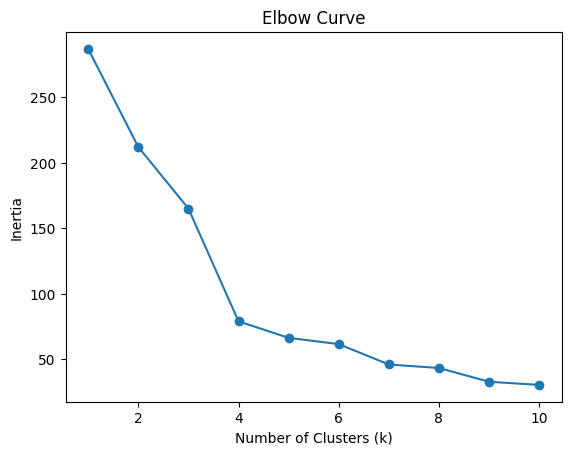

In [14]:
import matplotlib.pyplot as plt


# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Bssed on the output of the inertia, The data indicates that the drop of the inertia is significant from 1-4. K = 4 is positioned at the base of the elbow and can be visualized in the Line graph to inidcate the change in K. 4 would be the best choice for K.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [19]:
# Initialize the K-Means model using the best value for k
best_k = 4  # Assume from Elbow Curve
kmeans = KMeans(n_clusters=best_k, random_state=1)


In [18]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(df_market_data_scaled)
df_market_data_scaled["Cluster"] = kmeans.labels_


In [21]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame

from sklearn.cluster import KMeans

# Define the best k value (assume from Elbow Curve analysis)
best_k = 4  

# Initialize the K-Means model
kmeans = KMeans(n_clusters=best_k, random_state=1)

# Fit the K-Means model on the scaled DataFrame
kmeans.fit(df_market_data_scaled)

# Predict the clusters using the trained K-Means model
clusters = kmeans.predict(df_market_data_scaled)

# Print the resulting array of cluster values
print(clusters)



[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [22]:
# Create a copy of the scaled DataFrame
# Create a copy of the scaled DataFrame
df_market_data_scaled_copy = df_market_data_scaled.copy()

# Display the first few rows of the copied DataFrame
print(df_market_data_scaled_copy.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [ ]:


# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_market_data_scaled_copy["Cluster"] = clusters

# Display the first few rows of the updated DataFrame
print(df_market_data_scaled_copy.head())




              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [25]:
print(df_market_data_scaled.columns)


Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y', 'Cluster'],
      dtype='object')


In [26]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_market_data_scaled.hvplot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    by="Cluster", 
    hover_cols=["Cluster"]
)



:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [2]:
## Import required libraries
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
df_market_data = pd.read_csv("/Users/christinaland/Downloads/Challenge 19/Resources/crypto_market_data.csv", index_col="coin_id")

# Scale the data using StandardScaler
scaler = StandardScaler()
df_market_data_scaled = pd.DataFrame(
    scaler.fit_transform(df_market_data), 
    index=df_market_data.index, 
    columns=df_market_data.columns
)

# Display sample data to confirm it's defined
print(df_market_data_scaled.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is 0.8950, meaning that these three components together account for 89.5% of the variance in the original dataset.

In [3]:
#Apply PCA to reduce to 3 components
pca = PCA(n_components=3)

# Fit and transform the data
df_market_data_pca = pd.DataFrame(
    pca.fit_transform(df_market_data_scaled), 
    index=df_market_data_scaled.index, 
    columns=["PC1", "PC2", "PC3"]
)

# Display PCA-transformed data
print(df_market_data_pca.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [4]:
# Retrieve explained variance
explained_variance = pca.explained_variance_ratio_

# Print explained variance for each principal component
print(f"Explained Variance of PC1: {explained_variance[0]:.4f}")
print(f"Explained Variance of PC2: {explained_variance[1]:.4f}")
print(f"Explained Variance of PC3: {explained_variance[2]:.4f}")

# Total explained variance
total_explained_variance = explained_variance.sum()
print(f"Total Explained Variance (PC1 + PC2 + PC3): {total_explained_variance:.4f}")


Explained Variance of PC1: 0.3720
Explained Variance of PC2: 0.3470
Explained Variance of PC3: 0.1760
Total Explained Variance (PC1 + PC2 + PC3): 0.8950


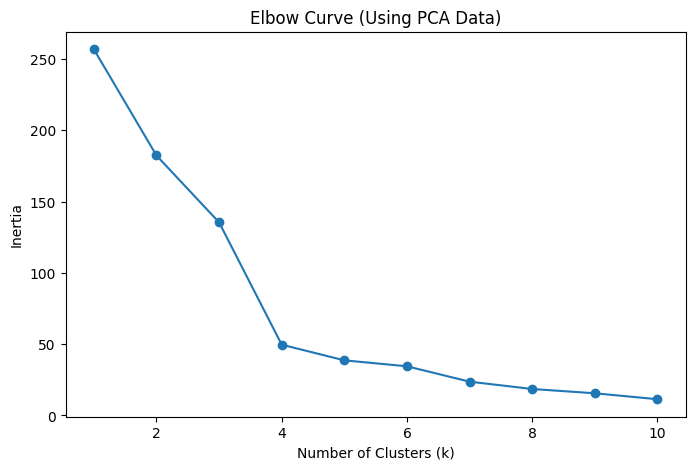

In [5]:
# Create a list for k-values (1 to 11)
k_values = range(1, 11)

# Create an empty list to store inertia values
inertia = []

# Loop through different k-values and compute inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(df_market_data_pca)
    inertia.append(kmeans.inertia_)

# Create a DataFrame to visualize the Elbow curve
df_elbow_pca = pd.DataFrame({"k": k_values, "inertia": inertia})

# Plot the Elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve (Using PCA Data)")
plt.show()


In [6]:
# Set the best k-value based on the Elbow curve (adjust as needed)
best_k_pca = 4  # Change this based on your Elbow plot results

# Initialize and fit K-Means
kmeans_pca = KMeans(n_clusters=best_k_pca, random_state=1)
df_market_data_pca["Cluster"] = kmeans_pca.fit_predict(df_market_data_pca)

# Display sample data with clusters
print(df_market_data_pca.head())


                   PC1       PC2       PC3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        2
ethereum     -0.458261  0.458466  0.952877        2
tether       -0.433070 -0.168126 -0.641752        0
ripple       -0.471835 -0.222660 -0.479053        0
bitcoin-cash -1.157800  2.041209  1.859715        2


In [7]:
# Scatter plot of PC1 vs. PC2 with clusters
df_market_data_pca.hvplot.scatter(
    x="PC1", 
    y="PC2", 
    by="Cluster", 
    hover_cols=["Cluster"], 
    title="PCA Clustering Visualization"
)


:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,Cluster)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

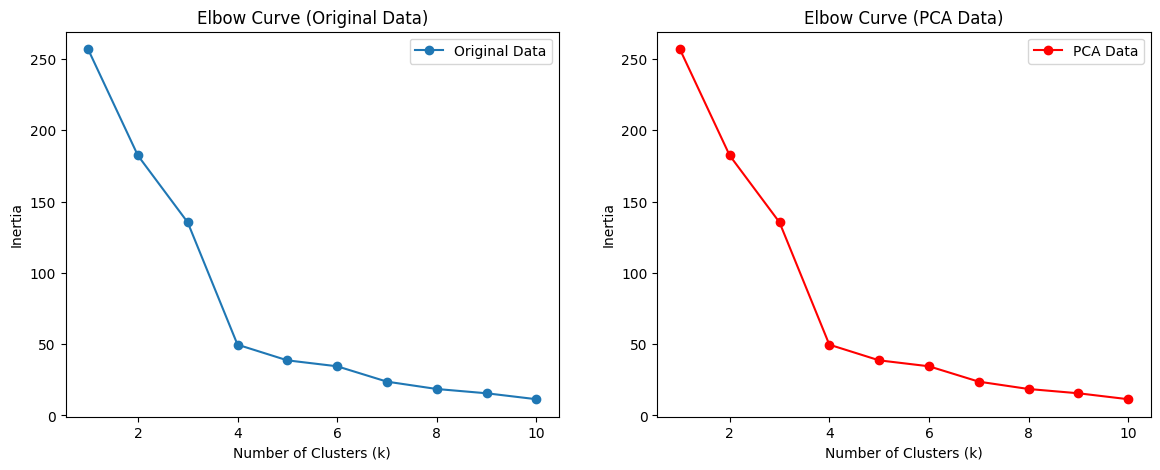

In [8]:
# Create Elbow curve plots side by side for comparison
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Elbow Curve for Original Data
ax[0].plot(range(1, 11), inertia, marker='o', label="Original Data")
ax[0].set_xlabel("Number of Clusters (k)")
ax[0].set_ylabel("Inertia")
ax[0].set_title("Elbow Curve (Original Data)")
ax[0].legend()

# Plot Elbow Curve for PCA Data
ax[1].plot(k_values, inertia, marker='o', color='red', label="PCA Data")
ax[1].set_xlabel("Number of Clusters (k)")
ax[1].set_ylabel("Inertia")
ax[1].set_title("Elbow Curve (PCA Data)")
ax[1].legend()

# Show the plots
plt.show()


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Overall, PCA enhanced clustering by simplifying the dataset while preserving its core structure, but the choice of the number of principal components kept balance variance retention and interpretability.







